In [172]:
%load_ext autoreload
%autoreload 2
from dynairxvis import plot
from datetime import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
categories = ['Nominal 1', 'Nominal 2', 'Nominal 2', 'Nominal 3']
tasks = [
    (datetime(2015, 1, 1), datetime.now()),  # N 1
    (datetime(2017, 1, 1), datetime(2019, 6, 1)),  # N 2
    (datetime(2021, 7, 1), datetime.now()), # Continuation of N 2 (after a gap)
    (datetime(2023, 1, 1), datetime.now()),  # N 3
]
start_col, end_col = zip(*tasks)


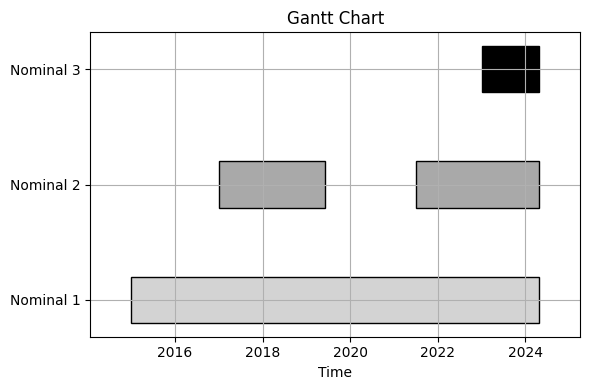

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Gantt Chart'}, xlabel='Time'>)

In [174]:
plot.gantt(categories,start_col, end_col)

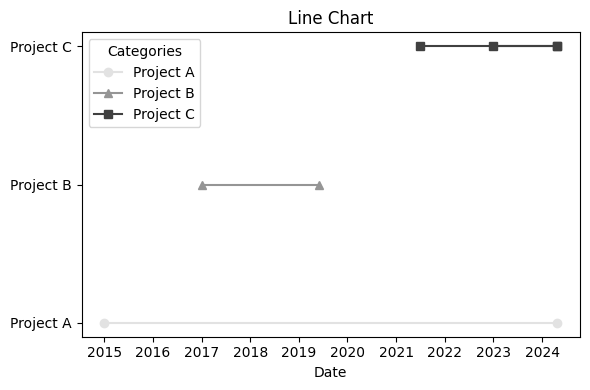

In [187]:
from dynairxvis.time import line
line(categories, start_dates=start_col, end_dates=end_col)

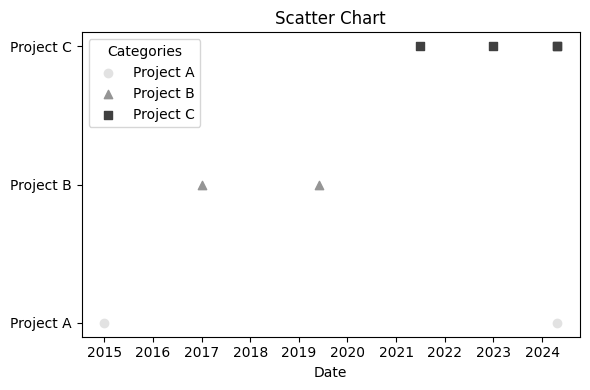

In [186]:
plot.scatter(categories, start_dates=start_col, end_dates=end_col)

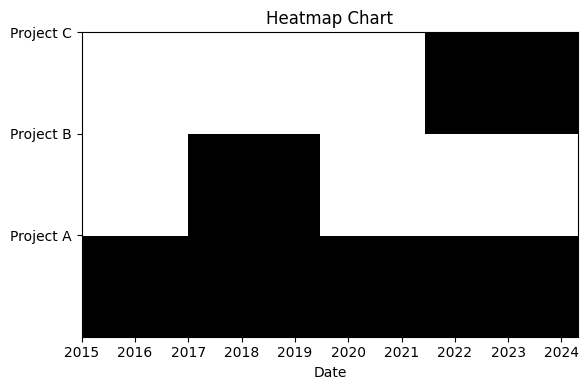

In [185]:
plot.heatmap(categories, start_dates=start_col, end_dates=end_col, mode='gantt')

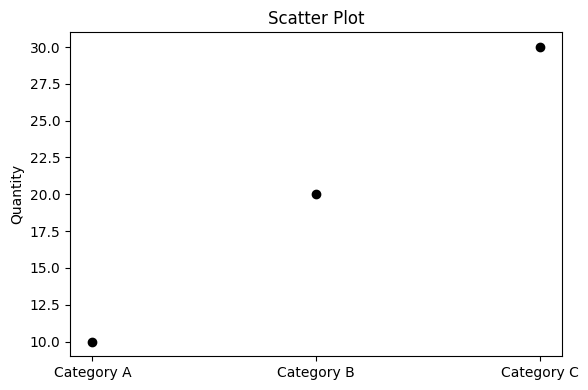

In [178]:
categories = ['Category A', 'Category B', 'Category C']
values = [10, 20, 30] # For 'scatter' mode

plot.scatter(categories, values=values, mode='scatter')

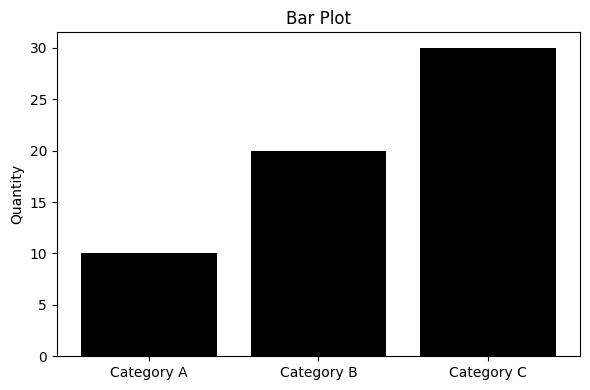

In [179]:
plot.scatter(categories, values=values, mode='bar')

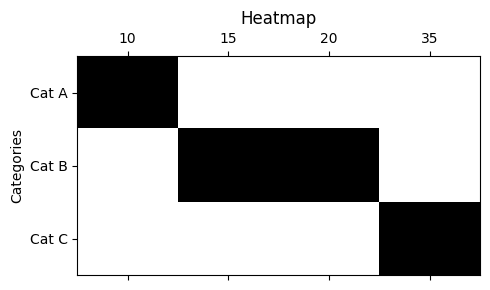

In [180]:
categories = ['Cat A', 'Cat B', 'Cat C']
values = [10, [15, 20], 35]
from dynairxvis.plot import heatmap
heatmap(categories, values)

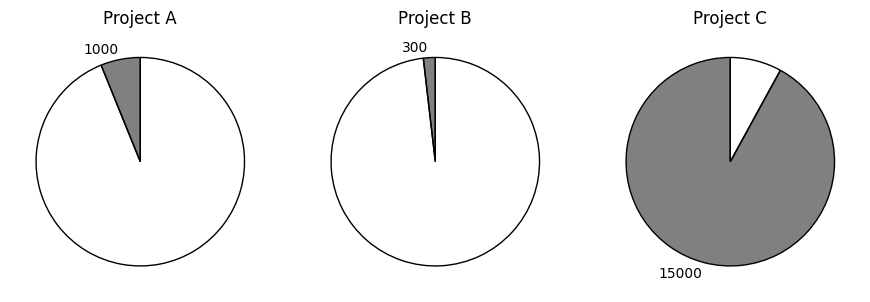

In [181]:
from dynairxvis.pie import pie
values = [1000, 300, 15000]
categories = ['Project A', 'Project B', 'Project C']
pie(categories, values)
# compare the function with below
# fig, axs = plt.subplots(1, len(categories), figsize=(len(categories) * 5, 5))
# for i, (category, value) in enumerate(zip(categories, values)):
#     axs[i].pie([value, (max(values)-value)], labels=[f'{value}', ''], colors=['gray', 'white'], startangle=90, wedgeprops=dict(edgecolor='black'))
#     axs[i].set_title(f'{category}')

# plt.tight_layout()
# plt.show()

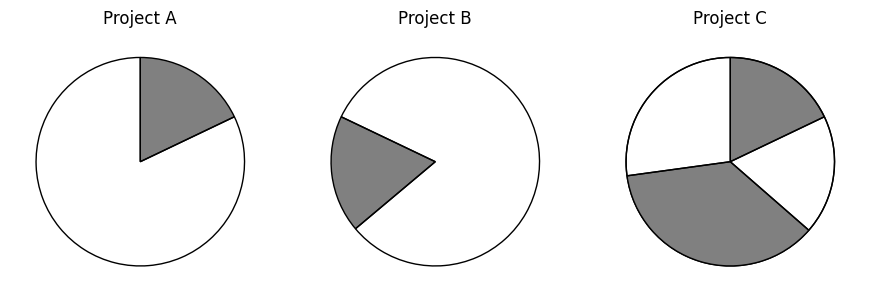

In [182]:
from dynairxvis.plot import pie
import datetime
categories = ['Project A', 'Project B', 'Project C', 'Project C']
start_dates = [datetime.datetime(2020, 1, 1), datetime.datetime(2020, 5, 1), datetime.datetime(2020, 8, 1), datetime.datetime(2020, 1, 1)]
end_dates = [datetime.datetime(2020, 3, 1), datetime.datetime(2020, 7, 1), datetime.datetime(2020, 12, 1), datetime.datetime(2020, 3, 1)]
pie(categories, time=True, start_dates=start_dates, end_dates=end_dates)